In [2]:
import random

def simulate_hat_process(n):
    hat = list(range(1, n+1))  # Creating a list of numbers from 1 to n
    random.shuffle(hat)  # Shuffling the hat

    while len(hat) > 1:  # Repeat until only one piece of paper remains
        a, b = random.sample(hat, 2)  # Draw two random pieces of paper
        difference = abs(a - b)  # Calculate the difference
        hat.remove(max(a, b))  # Remove the larger number
        hat.remove(min(a, b))  # Remove the smaller number
        hat.append(difference)  # Add the difference back to the hat

    return hat[0]  # Return the final piece of paper

final_piece = simulate_hat_process(5)
print("The final piece of paper left in the hat is:", final_piece)


The final piece of paper left in the hat is: 5


In [3]:
import random

def simulate_hat_process(n):
    final_numbers = []
    hat = list(range(1, n+1))  # Creating a list of numbers from 1 to n
    random.shuffle(hat)  # Shuffling the hat

    while len(hat) > 1:  # Repeat until only one piece of paper remains
        a, b = random.sample(hat, 2)  # Draw two random pieces of paper
        difference = abs(a - b)  # Calculate the difference
        hat.remove(max(a, b))  # Remove the larger number
        hat.remove(min(a, b))  # Remove the smaller number
        hat.append(difference)  # Add the difference back to the hat

    final_numbers.append(hat[0])  # Store the final piece of paper

    return final_numbers  # Return all final numbers

all_final_numbers = []
for _ in range(100):  # Run simulation multiple times to collect various outcomes
    final_number = simulate_hat_process(3)
    all_final_numbers.extend(final_number)

print("Total number of outcomes:", len(all_final_numbers))
print("Sample of outcomes:")
print(all_final_numbers[:10])  # Print the first 10 outcomes as a sample


Total number of outcomes: 100
Sample of outcomes:
[0, 2, 0, 0, 2, 0, 0, 2, 0, 0]


In [4]:
import random

def find_all_possibilities(num_papers):
    # Initialize the hat with numbers from 1 to num_papers
    hat = list(range(1, num_papers + 1))
    possibilities = []  # List to store all possible final pieces of paper
   
    # Recursive function to explore all possible sequences
    def explore(hat, sequence):
        if len(hat) == 1:
            possibilities.append(sequence + [hat[0]])
        else:
            for i in range(len(hat)):
                for j in range(i + 1, len(hat)):
                    draw1 = hat[i]
                    draw2 = hat[j]
                    new_hat = [num for idx, num in enumerate(hat) if idx != i and idx != j]
                    larger = max(draw1, draw2)
                    smaller = min(draw1, draw2)
                    difference = larger - smaller
                    explore(new_hat + [difference], sequence + [(draw1, draw2, difference)])
   
    # Start exploring all possibilities
    explore(hat, [])
   
    return possibilities

# Get all possible outcomes for 4 pieces of paper
all_possibilities = find_all_possibilities(6)

# Print all possible sequences
for i, possibility in enumerate(all_possibilities):
    print(f"Sequence {i + 1}:")
    for step in possibility:
        if isinstance(step, int):
            print(f"  Final piece of paper: {step}")
        else:
            print(f"  Draw: {step[0]} and {step[1]}, Subtract: {step[0]} - {step[1]} = {step[2]}")
    print()

Sequence 1:
  Draw: 1 and 2, Subtract: 1 - 2 = 1
  Draw: 3 and 4, Subtract: 3 - 4 = 1
  Draw: 5 and 6, Subtract: 5 - 6 = 1
  Draw: 1 and 1, Subtract: 1 - 1 = 0
  Draw: 1 and 0, Subtract: 1 - 0 = 1
  Final piece of paper: 1

Sequence 2:
  Draw: 1 and 2, Subtract: 1 - 2 = 1
  Draw: 3 and 4, Subtract: 3 - 4 = 1
  Draw: 5 and 6, Subtract: 5 - 6 = 1
  Draw: 1 and 1, Subtract: 1 - 1 = 0
  Draw: 1 and 0, Subtract: 1 - 0 = 1
  Final piece of paper: 1

Sequence 3:
  Draw: 1 and 2, Subtract: 1 - 2 = 1
  Draw: 3 and 4, Subtract: 3 - 4 = 1
  Draw: 5 and 6, Subtract: 5 - 6 = 1
  Draw: 1 and 1, Subtract: 1 - 1 = 0
  Draw: 1 and 0, Subtract: 1 - 0 = 1
  Final piece of paper: 1

Sequence 4:
  Draw: 1 and 2, Subtract: 1 - 2 = 1
  Draw: 3 and 4, Subtract: 3 - 4 = 1
  Draw: 5 and 1, Subtract: 5 - 1 = 4
  Draw: 6 and 1, Subtract: 6 - 1 = 5
  Draw: 4 and 5, Subtract: 4 - 5 = 1
  Final piece of paper: 1

Sequence 5:
  Draw: 1 and 2, Subtract: 1 - 2 = 1
  Draw: 3 and 4, Subtract: 3 - 4 = 1
  Draw: 5 and 1, S

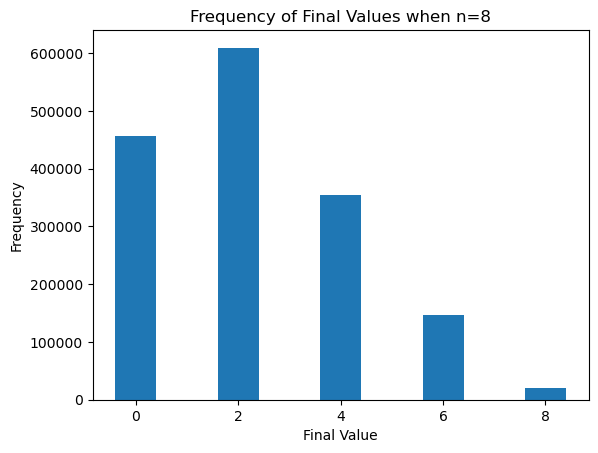

In [5]:
import random
import matplotlib.pyplot as plt

def find_all_possibilities(num_papers):
    hat = list(range(1, num_papers + 1))
    possibilities = []
    final_values_frequency = {}  # Dictionary to store the frequency of each final value
    
    def explore(hat, sequence):
        if len(hat) == 1:
            final_value = hat[0]
            possibilities.append(sequence + [final_value])
            final_values_frequency[final_value] = final_values_frequency.get(final_value, 0) + 1
        else:
            for i in range(len(hat)):
                for j in range(i + 1, len(hat)):
                    draw1 = hat[i]
                    draw2 = hat[j]
                    new_hat = [num for idx, num in enumerate(hat) if idx != i and idx != j]
                    larger = max(draw1, draw2)
                    smaller = min(draw1, draw2)
                    difference = larger - smaller
                    explore(new_hat + [difference], sequence + [(draw1, draw2, difference)])
   
    explore(hat, [])
    
    return possibilities, final_values_frequency
k=8
all_possibilities, final_values_frequency = find_all_possibilities(k)

# Plotting the bar chart
plt.bar(final_values_frequency.keys(), final_values_frequency.values())
plt.xlabel('Final Value')
plt.ylabel('Frequency')
plt.title('Frequency of Final Values when n='+str(k))
plt.show()


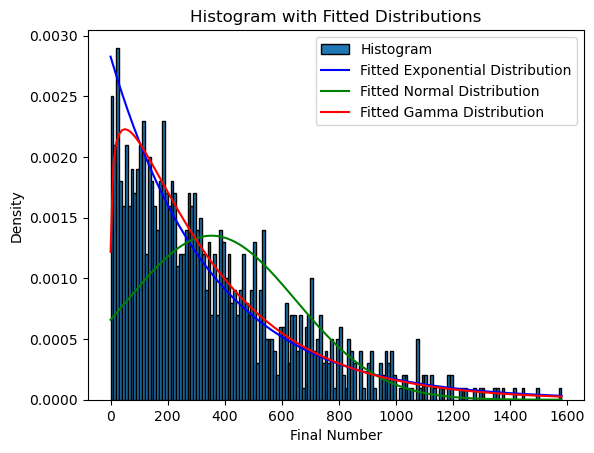

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import expon, poisson, gamma, norm
from scipy.optimize import curve_fit


# Function to simulate hat process
def simulate_hat_process(n):
    final_numbers = []
    hat = list(range(1, n+1))  # Creating a list of numbers from 1 to n
    random.shuffle(hat)  # Shuffling the hat

    while len(hat) > 1:  # Repeat until only one piece of paper remains
        a, b = random.sample(hat, 2)  # Draw two random pieces of paper
        difference = abs(a - b)  # Calculate the difference
        hat.remove(max(a, b))  # Remove the larger number
        hat.remove(min(a, b))  # Remove the smaller number
        hat.append(difference)  # Add the difference back to the hat

    final_numbers.append(hat[0])  # Store the final piece of paper

    return final_numbers  # Return all final numbers

all_final_numbers = []
for _ in range(1000):  # Run simulation multiple times to collect various outcomes
    final_number = simulate_hat_process(2024)
    all_final_numbers.extend(final_number)

# Your simulation code here to generate all_final_numbers

# Plotting the histogram
bin_width = 10
max_final_number = max(all_final_numbers)
num_bins = max_final_number // bin_width + 1
bins = range(0, (num_bins * bin_width) + 1, bin_width)
hist, bin_edges = np.histogram(all_final_numbers, bins=bins, density=True)

# Fitting Exponential Distribution
param_exp = expon.fit(all_final_numbers)
pdf_fit_exp = expon.pdf(bin_edges, *param_exp)

# Fit a normal distribution to the data
mean, std_dev = norm.fit(all_final_numbers)
pdf_fit = norm.pdf(bin_edges, mean, std_dev)

# Fitting Gamma Distribution
param_gamma = gamma.fit(all_final_numbers)
pdf_fit_gamma = gamma.pdf(bin_edges, *param_gamma)

# Plotting the histogram
plt.hist(all_final_numbers, bins=bins, density=True, align='mid', edgecolor='black', label='Histogram')

# Plotting the fitted distributions
plt.plot(bin_edges, pdf_fit_exp, color='blue', label='Fitted Exponential Distribution')
plt.plot(bin_edges, pdf_fit, color='green', label='Fitted Normal Distribution')
plt.plot(bin_edges, pdf_fit_gamma, color='red', label='Fitted Gamma Distribution')

plt.title('Histogram with Fitted Distributions')
plt.xlabel('Final Number')
plt.ylabel('Density')
plt.legend()
plt.show()


In [7]:
param_exp = expon.fit(all_final_numbers)
print("Exponential Distribution Parameters:", param_exp)


Exponential Distribution Parameters: (0.0, 353.796)


In [8]:
param_gamma = gamma.fit(all_final_numbers)
print("Gamma Distribution Parameters:", param_gamma)

Gamma Distribution Parameters: (1.1667750584626853, -0.5040950368062931, 303.657564602319)
